# Jupyter Notebook

## Introduction
Jupyter Notebook documents contain two types of cells. This cell, for example, contains text that can be formatted using markdown syntax (see [here](https://www.markdownguide.org/basic-syntax/) for a guide) whereas the other type of cells contains code that can be run by a Python, R, or Julia kernel.
In order to showcase the capabilities of a Jupyter Notebook with respect to dynamic reporting, the following cells import a data set which contains the names of newborn children in the city of Zurich since 1993. The data set is published by the city of Zurich and can be downloaded under this [link](https://data.stadt-zuerich.ch/dataset/bev_vornamen_baby_od3700).

## Loading Python modules

The next cell is the first cell that, in this case, contains Python code. It imports the necessary modules such that we can run this small example analysis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing and manipulating the data

Now that this is done, we can import the data set and perform the desired operations on it. Here, we will first rename the columns of the data frame and then find the most common name(s) for each gender and year.

In [5]:
# Import data set
dat = pd.read_csv("../data/namesZurich.csv")

# Rename the columns
dat.rename(columns = {"StichtagDatJahr": "year", "Vorname": "name",
                      "SexLang":"sex", "AnzGebuWir":"births"}, inplace = True)

# Replace sex by english expressions
dat["sex"] = np.where(dat["sex"] == "männlich", "male", "female")

# Get the most common name(s) per year and sex
idx = dat.groupby(["year", "sex"])["births"].transform(max) == dat["births"]
datClean = dat[idx].sort_values(["year", "sex"]).reset_index(drop = True)

In [6]:
datClean

,year,name,sex,births
0,1993,Laura,female,31
1,1993,Michael,male,22
2,1993,Simon,male,22
3,1994,Sarah,female,23
4,1994,David,male,29
...,...,...,...,...
60,2019,Louis,male,23
61,2020,Sofia,female,24
62,2020,Leo,male,23
63,2021,Olivia,female,28


## Visualising the data

Now that we have the data we want, we can visualize it. Note, however, that for some years and genders, there are more than one most common name.

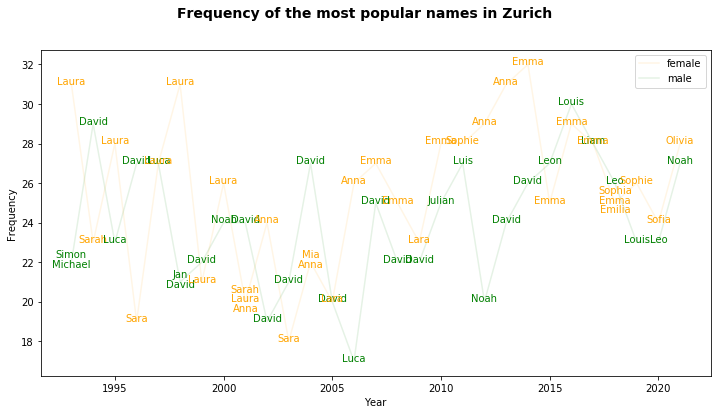

In [7]:
# Set up the plot
fig = plt.figure()
ax = fig.add_subplot()

# Set figure height and width
fig.set_figheight(6)
fig.set_figwidth(12)

# Set titles for the figure and the subplot respectively
fig.suptitle("Frequency of the most popular names in Zurich", 
             fontsize = 14, fontweight = "bold")
ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

# Add lines for Frequency of names
for sex in datClean["sex"].unique():
    idx = datClean["sex"] == sex
    ax.plot(datClean["year"][idx],
            datClean["births"][idx], 
            color = "green" if sex == "male" else "orange",
            alpha = 0.1, label = "male" if sex == "male" else "female")

# Add name labels
spacing = 0.5
for year in datClean["year"].unique():
    for sex in ["male", "female"]:
        # Get the names
        idx1 = datClean["year"] == year
        idx2 = datClean["sex"] == sex
        idx = np.logical_and(idx1, idx2)
        names = datClean["name"][idx].values
        # Calculate where to put them
        n_names = len(names)
        pos_x = year
        pos_y = datClean["births"][idx].unique()
        if n_names > 1:
            if(n_names % 2 == 0):
                bounds = pos_y + np.array([-1, 1]) * (spacing / 2 + (n_names / 2 - 1) * spacing)
                pos_y = np.linspace(bounds[0], bounds[1], n_names)
            else:
                bounds = pos_y + np.array([-1, 1]) * ((n_names - 1) / 2 * spacing)
                pos_y = np.linspace(bounds[0], bounds[1], n_names)
        # Set the color
        color = "green" if sex == "male" else "orange"
        for i in range(len(names)):
            ax.text(pos_x, pos_y[i], names[i], color = color,
                    ha = "center")

# Add a legend
ax.legend()
            
# show the plot
plt.show()